# Basis of Deep Learning

## Compute gradient

In [12]:
import torch

In [15]:
X = torch.Tensor(2, 3)  # create 2*3 tensor consists of random number
print(X)

tensor([[-9.3795e-17,  3.0777e-41, -9.3797e-17],
        [ 3.0777e-41,  8.9683e-44,  0.0000e+00]])


In [16]:
X = torch.tensor([[1,2,3],[4,5,6]])  # create 2*3 tensor consists of [1,2,3], [4,5,6] 
print(X)

tensor([[1, 2, 3],
        [4, 5, 6]])


In [18]:
x_tensor = torch.tensor(data = [2.0, 3.0], requires_grad = True)  # equires_grad=False doesn't save gradients
print(x_tensor)

tensor([2., 3.], requires_grad=True)


In [20]:
x = torch.tensor(data = [2.0, 3.0], requires_grad = True)
y = x**2
z = 2*y+3

target = torch.tensor([3.0, 4.0])
loss = torch.sum(torch.abs(z-target))
loss.backward()

print(x.grad, y.grad, z.grad)  # only x.grad will be calculated, because x is leaf_node, and others are not

tensor([ 8., 12.]) None None


In [33]:
import torch
import torch.nn as nn   # module for deep neural network model
import torch.optim as optim  # module contains gradient descent algorithms
import torch.nn.init as init  # module for initialize value
import matplotlib.pyplot as plt

print x[0:5]: tensor([[ 5.4068],
        [ 9.5525],
        [-8.4738],
        [ 6.3894],
        [-1.7527]])
print y[0:5]: tensor([[-0.3042],
        [ 1.6055],
        [-1.2106],
        [-0.2181],
        [ 0.1950]])
tensor(12.2827)
-0.41924458742141724 0.4969114065170288
tensor(9.9706)
0.06113261729478836 0.510871410369873
tensor(7.6992)
0.5369958281517029 0.5278114676475525
tensor(5.5167)
1.0025922060012817 0.5496514439582825
tensor(3.5630)
1.438759207725525 0.5809513926506042
tensor(2.5464)
1.7293798923492432 0.6399314403533936
tensor(2.3181)
1.8438969850540161 0.7238314151763916
tensor(2.2007)
1.8998312950134277 0.8147913217544556
tensor(2.1011)
1.9350719451904297 0.9078114032745361
tensor(2.0066)
1.9617382287979126 1.0010513067245483
tensor(1.9166)
1.980662226676941 1.0938712358474731
tensor(1.8304)
1.9929513931274414 1.1857514381408691
tensor(1.7478)
1.9994194507598877 1.2762113809585571
tensor(1.6681)
2.0013246536254883 1.3653113842010498
tensor(1.5909)
2.0066115856170654 1.4

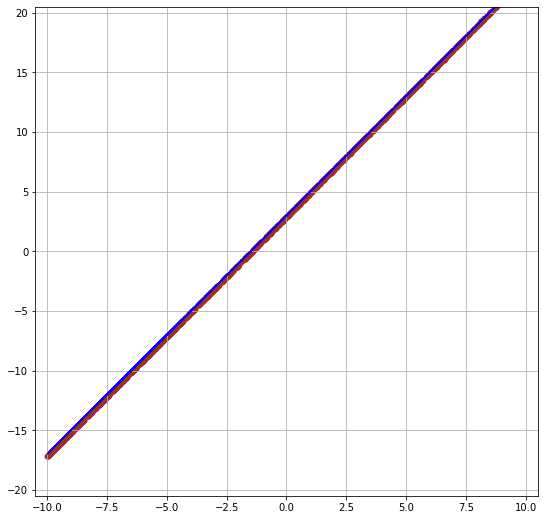

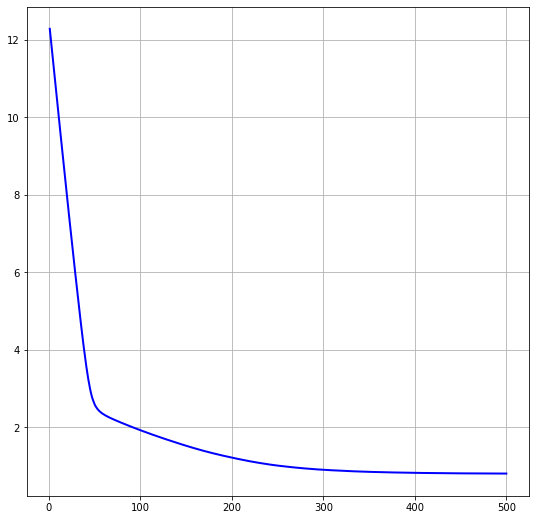

In [63]:
# designate number of data and number of epoch
num_data = 1000
num_epoch = 500

# initialize x, y, noise
x = init.uniform_(torch.Tensor(num_data, 1), -10, 10)  # x_shape = [1000,1], selected from randomly uniform dist [-10, 10]
print('print x[0:5]:', x[0:5])
noise = init.normal_(torch.FloatTensor(num_data, 1), std=1)  # noise_shape = [1000, 1], selected from norman dist [0, 1] with std = 1
print('print y[0:5]:', noise[0:5])
y = 2*x+3
y_noise = y + noise

# build model
model = nn.Linear(1, 1)
loss_func = nn.L1Loss()
optimizer = optim.SGD(model.parameters(), lr = 0.01)

# traininig
label = y_noise
loss_all = []
for i in range(num_epoch):
    optimizer.zero_grad()  # initialize gradient
    output = model(x)
    
    loss = loss_func(output, label)
    loss.backward()
    optimizer.step()  # calculate gradient and flow
    
    loss_all.append(loss.item())

    if i%10==0:
        print(loss.data)
        param_list = list(model.parameters())  # param_list : save model parameters into list
        print(param_list[0].item(), param_list[1].item())  # in order to see how w and b changes, print value of param_list[0],param_list[1]
        
# plotting y and output
fig = plt.figure(figsize = (9, 9))
ax = fig.add_subplot(1, 1, 1)
ax.grid()
ax.set(xlim = [-10.5, 10.5], ylim = [-20.5, 20.5])
ax.plot(x, y, color = 'blue', linewidth=1)
ax.scatter(x.detach().numpy(), output.detach().numpy(), color='brown', linewidths = 0.001)
plt.show()

# plotting loss
fig = plt.figure(figsize = (9, 9))
ax = fig.add_subplot(1, 1, 1)
ax.grid()
ax.plot(range(1, num_epoch+1), loss_all, color = 'blue', linewidth=2)
plt.show()